# Import Library

In [49]:
import cv2
import matplotlib.pyplot as plt
import  numpy as np

In [50]:
citra = cv2.imread("mobil.png")
citra = cv2.cvtColor(citra,cv2.COLOR_BGR2GRAY)

In [51]:
copyCitra1 = citra.copy().astype(float)

m1,n1 = copyCitra1.shape
output1 = np.empty([m1,n1])

print("shape copyCitra1 : ", copyCitra1.shape)
print("shape ouput1 : ", output1.shape)
print("m1 : ", m1)
print("n1 : ", n1)

shape copyCitra1 :  (1080, 1920)
shape ouput1 :  (1080, 1920)
m1 :  1080
n1 :  1920


## FILTER RATA-RATA

In [53]:
for baris in range (0,m1-1):
    for kolom in range (0,n1-1):
        a =  baris
        b = kolom
        jumlah = copyCitra1[a-1,b-1] + copyCitra1[a-1,b] + copyCitra1[a-1,b+1]+\
        copyCitra1[a,b-1] + copyCitra1[a,b] + copyCitra1[a,b+1] +\
        copyCitra1[a+1, b-1] + copyCitra1[a+1, b] + copyCitra1[a+1,b+1]
        output1[a,b] = 1/9*jumlah

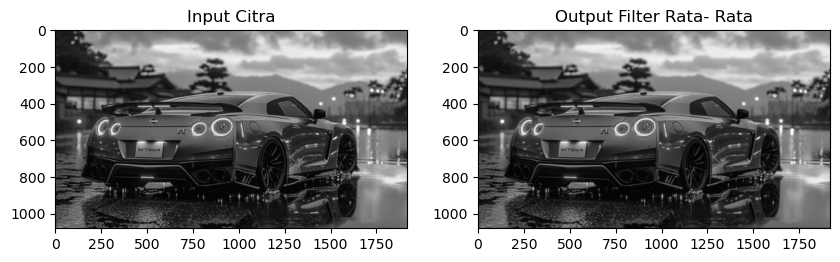

In [54]:
fig, axs = plt.subplots(1,2, figsize=(10,10))
ax = axs.ravel()

ax[0].imshow(citra, cmap='gray')
ax[0].set_title('Input Citra')

ax[1].imshow(output1, cmap='gray')
ax[1].set_title('Output Filter Rata- Rata')
plt.show()

## FILTER MEDIAN

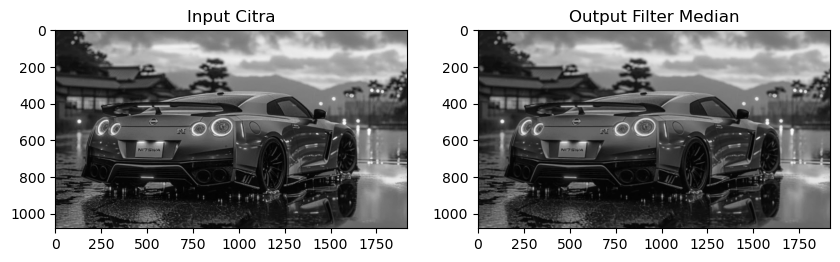

In [56]:
img_median = citra.copy()
img_median = cv2.cvtColor(img_median, cv2.COLOR_BGR2RGB)
img_median_after = cv2.medianBlur(img_median,5)

fig, axs = plt.subplots(1,2, figsize=(10,10))
ax = axs.ravel()

ax[0].imshow(citra, cmap='gray')
ax[0].set_title('Input Citra')

ax[1].imshow(img_median_after, cmap='gray')
ax[1].set_title('Output Filter Median')
plt.show()

## FILTER BATAS

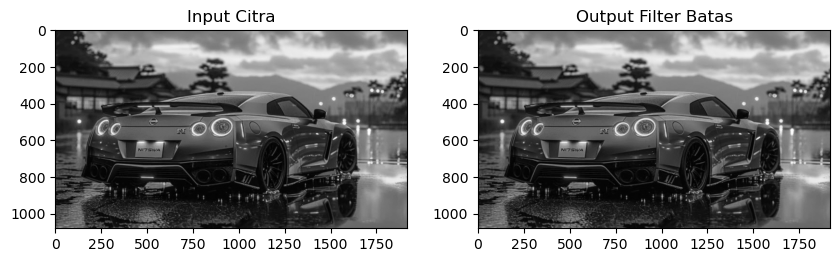

In [58]:
citra1 = citra.copy()

for baris in range(0,m1-1):
    for kolom in range(0,n1-1):
        a = baris
        b = kolom

        arr = np.array([copyCitra1[a-1,b-1], copyCitra1[a-1,b], copyCitra1[a-1,b+1],
                        copyCitra1[a,b-1], copyCitra1[a,b], copyCitra1[a,b+1],
                        copyCitra1[a+1,b-1], copyCitra1[a+1, b], copyCitra1[a+1, b+1]])

        minPiksel = np.amin(arr)
        maxPiksel = np.amax(arr)

        if copyCitra1[baris, kolom]<minPiksel:
            output1[baris,kolom] = minPiksel
        else:
            if copyCitra1[baris,kolom]>maxPiksel:
                output1[baris,kolom] = maxPiksel
            else:
                output1[baris,kolom] = copyCitra1[baris,kolom]
fig, axs = plt.subplots(1,2, figsize=(10,10))
ax = axs.ravel()

ax[0].imshow(citra, cmap='gray')
ax[0].set_title('Input Citra')

ax[1].imshow(copyCitra1, cmap='gray')
ax[1].set_title('Output Filter Batas')
plt.show()